In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objects as go
import plotly.express as px

In [2]:
fashion_data = pd.read_csv('/content/Fashion_Trend_Analysis_Dataset.csv')

In [3]:
fashion_data.head()

,DateTime,Product_Category,Price_Range,Season,Color_Palette,Material_Type,Customer_Rating,Sales_Volume,Region
0,2023-08-22,Accessories,Low,Winter,Neutral,Wool,2.5,551,South America
1,2023-01-10,Tops,High,All Seasons,Dark,Wool,4.8,194,Australia
2,2023-04-11,Dresses,Medium,Spring,Bright,Silk,3.9,250,Australia
3,2023-03-23,Shoes,High,Winter,Bright,Silk,3.4,978,North America
4,2023-09-26,Tops,Medium,Winter,Neutral,Polyester,1.6,773,North America


In [4]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateTime          500 non-null    object 
 1   Product_Category  500 non-null    object 
 2   Price_Range       500 non-null    object 
 3   Season            500 non-null    object 
 4   Color_Palette     500 non-null    object 
 5   Material_Type     500 non-null    object 
 6   Customer_Rating   500 non-null    float64
 7   Sales_Volume      500 non-null    int64  
 8   Region            500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [5]:
fashion_data.isnull().sum()

,0
DateTime,0
Product_Category,0
Price_Range,0
Season,0
Color_Palette,0
Material_Type,0
Customer_Rating,0
Sales_Volume,0
Region,0


In [6]:
fig1 = px.bar(fashion_data,x='Customer_Rating',y='Sales_Volume',color='Customer_Rating',color_discrete_sequence=px.colors.sequential,title='Sales Volume vs Customer Rating',
     width=1000,height=400)

fig1.show()

In [7]:
fig2 = px.pie(fashion_data, names='Price_Range', title='Distribution of Price Ranges')
fig2.show()

In [8]:
overall_sales_by_category = fashion_data.groupby('Product_Category')['Sales_Volume'].sum().reset_index()
fig3 = px.bar(overall_sales_by_category, x='Product_Category', y='Sales_Volume',
              title="Overall Sales Volume by Product Category",
              color='Product_Category')
fig3.show()

In [9]:
fig4= px.box(fashion_data, x="Product_Category", y="Customer_Rating",
              title="Customer Ratings by Product Category",
              color="Product_Category")
fig4.show()

In [10]:
fig5= px.scatter(fashion_data, x="Customer_Rating", y="Sales_Volume",
                  color="Product_Category",
                  title="Sales Volume vs Customer Rating",
                  size="Sales_Volume", hover_data=["Product_Category"])
fig5.show()

In [11]:
heatmap_data = fashion_data.pivot_table(values="Sales_Volume",index="Season",columns="Region",aggfunc="sum").fillna(0)
fig6 = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale="Viridis",
    colorbar=dict(title="Sales Volume")
))

fig6.update_layout(title="Sales Volume by Season and Region",
                   xaxis_title="Region", yaxis_title="Season")
fig6.show()

In [12]:
fig7 = px.sunburst(fashion_data, path=["Product_Category", "Material_Type"],
                   values="Sales_Volume",
                   title="Sales Breakdown by Product Category and Material Type")
fig7.show()

In [13]:
fig8 = px.treemap(fashion_data, path=["Region", "Product_Category"],
                  values="Sales_Volume",
                  title="Sales Contribution by Region and Product Category")
fig8.show()

In [14]:
fashion_data['DateTime'] = pd.to_datetime(fashion_data['DateTime'])

In [15]:
categorical_columns = ['Product_Category', 'Price_Range', 'Season', 'Color_Palette', 'Material_Type', 'Region']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    fashion_data[col] = label_encoders[col].fit_transform(fashion_data[col])

In [16]:
fashion_data

,DateTime,Product_Category,Price_Range,Season,Color_Palette,Material_Type,Customer_Rating,Sales_Volume,Region
0,2023-08-22,0,1,4,3,4,2.5,551,4
1,2023-01-10,4,0,0,1,4,4.8,194,1
2,2023-04-11,1,2,2,0,3,3.9,250,1
3,2023-03-23,3,0,4,0,3,3.4,978,3
4,2023-09-26,4,2,4,3,2,1.6,773,3
...,...,...,...,...,...,...,...,...,...
495,2023-09-05,4,0,3,3,3,2.4,883,4
496,2023-05-28,1,1,1,2,2,3.3,571,4
497,2023-03-02,3,2,4,0,3,1.3,566,3
498,2023-06-20,2,2,3,1,0,4.9,684,0


In [17]:
scaler = StandardScaler()
fashion_data[['Customer_Rating', 'Sales_Volume']] = scaler.fit_transform(fashion_data[['Customer_Rating', 'Sales_Volume']])

In [18]:
features = fashion_data.drop(columns=['DateTime'])

In [19]:
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

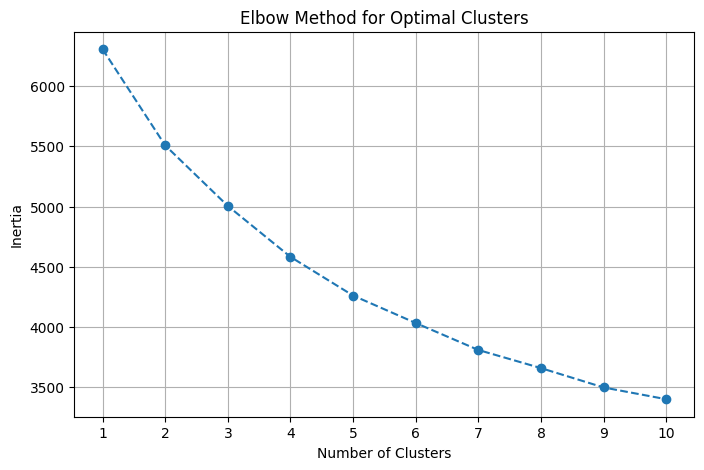

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker="o", linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [21]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
fashion_data['KMeans_Cluster'] = kmeans.fit_predict(features)

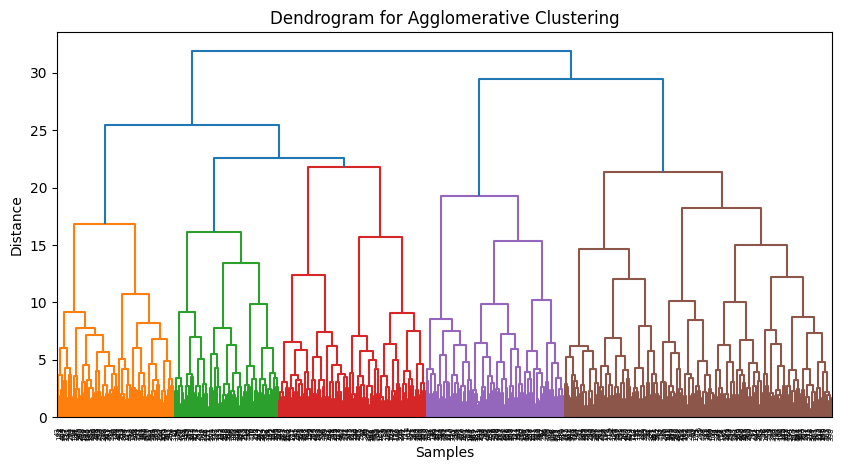

In [29]:
linked = linkage(features, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [22]:
pca = PCA(n_components=2)
fashion_data_pca = pca.fit_transform(features)
fashion_data['PCA1'] = fashion_data_pca[:, 0]
fashion_data['PCA2'] = fashion_data_pca[:, 1]

fig = px.scatter(fashion_data, x='PCA1', y='PCA2', color='KMeans_Cluster',
                 color_continuous_scale='viridis', title="Clusters Visualized with PCA")
fig.show()


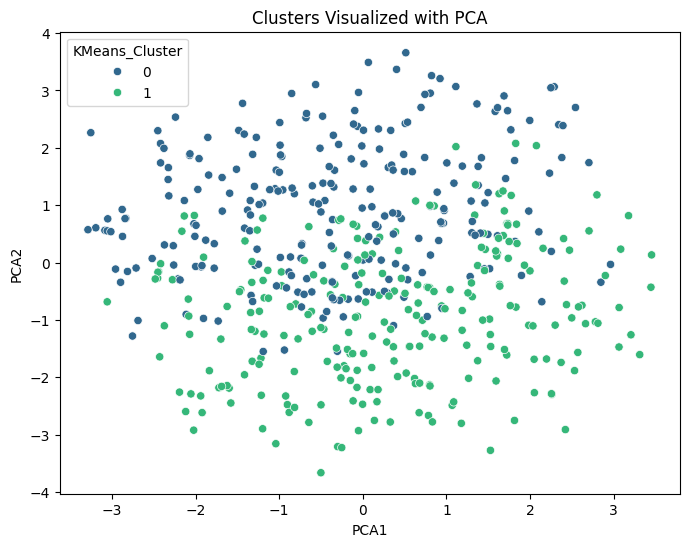

In [23]:
pca = PCA(n_components=2)
fashion_data_pca = pca.fit_transform(features)

fashion_data['PCA1'] = fashion_data_pca[:, 0]
fashion_data['PCA2'] = fashion_data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=fashion_data, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis')
plt.title("Clusters Visualized with PCA")
plt.show()


In [24]:
cluster_summary = fashion_data.groupby('KMeans_Cluster').mean()
print(cluster_summary)


                                    DateTime  Product_Category  Price_Range  \
KMeans_Cluster                                                                
0              2023-06-25 20:53:26.477732864          2.068826     0.975709   
1              2023-07-09 00:51:13.517786624          1.826087     1.090909   

                  Season  Color_Palette  Material_Type  Customer_Rating  \
KMeans_Cluster                                                            
0               0.817814        2.17004       1.720648        -0.030425   
1               3.264822        1.87747       2.110672         0.029703   

                Sales_Volume    Region      PCA1      PCA2  
KMeans_Cluster                                              
0                   0.060802  1.971660 -0.343564  0.938860  
1                  -0.059360  2.252964  0.335416 -0.916594  


In [25]:
fashion_data[fashion_data['KMeans_Cluster'] == 0].head()
fashion_data[fashion_data['KMeans_Cluster'] == 1].head()


,DateTime,Product_Category,Price_Range,Season,Color_Palette,Material_Type,Customer_Rating,Sales_Volume,Region,KMeans_Cluster,PCA1,PCA2
0,2023-08-22,0,1,4,3,4,-0.414541,0.092895,4,1,0.373570,-1.715307
2,2023-04-11,1,2,2,0,3,0.758847,-0.965209,1,1,0.829116,-1.298784
3,2023-03-23,3,0,4,0,3,0.339780,1.593926,3,1,2.052807,-2.268131
4,2023-09-26,4,2,4,3,2,-1.168862,0.873291,3,1,1.374084,-0.052220
5,2023-09-04,0,2,2,2,3,-1.168862,-0.051232,4,1,-0.465677,-1.161398


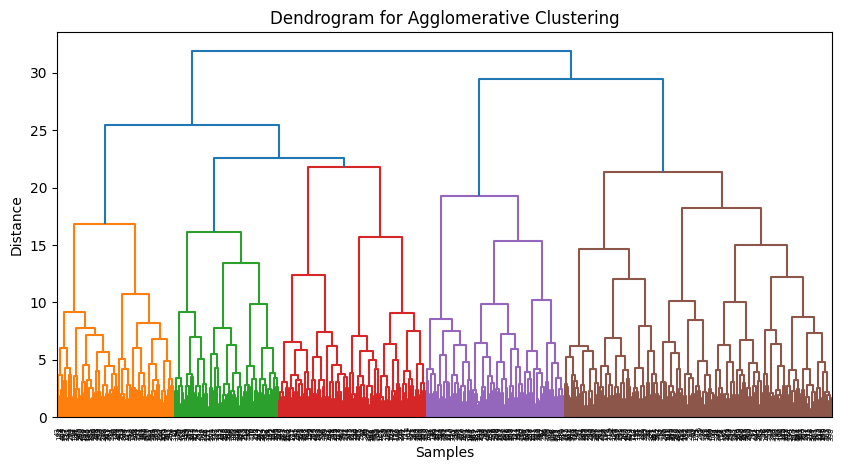

In [28]:
linked = linkage(features, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
